In [4]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

import numpy as np
from tqdm import tqdm
from scipy.special import softmax as softmax
import matplotlib.pyplot as plt

import importlib
import RecurrentForest as RF
importlib.reload(RF)

<module 'RecurrentForest' from 'D:\\Documents\\AI\\BrainInspired\\RecurrentForest\\RecurrentForest.py'>

In [3]:
# params
T = 10
p_connect = .2
p_feature = .4
p_example = .3
n_trees = 100

In [6]:
rfc_acc = []
abc_acc = []
rrfc_acc = []

for i in range(50):
    X, y = make_classification(n_samples=5_000, n_features=100)
    X_train, X_test, y_train, y_test = TTS(X, y, test_size = .2)
    RF1 = RF.RecurrentForest(X_train, y_train, T, n_trees, p_connect, p_feature, p_example)
    RF1.train()
    y_hat = RF1.predictNew(X_test)
    rrfc_acc.append(np.mean(y_hat == y_test))
    abc = ABC().fit(X_train, y_train)
    rfc = RFC(n_estimators=100).fit(X_train, y_train)
    y_hat_abc = abc.predict(X_test)
    y_hat_rfc = rfc.predict(X_test)
    abc_acc.append(np.mean(y_hat_abc == y_test))
    rfc_acc.append(np.mean(y_hat_rfc == y_test))
    
    
    
    
    

  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


  0%|                                                                                                                                              | 0/10 [00:00<?, ?it/s]

...Forest Initialized...
<<< Training RecurrentForest >>>


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.36s/it]


In [7]:
means = [np.mean(i) for i in [rrfc_acc, rfc_acc, abc_acc]]
std = [np.std(i) for i in [rrfc_acc, rfc_acc, abc_acc]]
names = ["RecurrentForest", "RandomForest", "AdaBoost"]

Text(0.5, 1.0, 'Accuracy of 3 Ensemble Methods Averaged Over 50 Random Classification Problems')

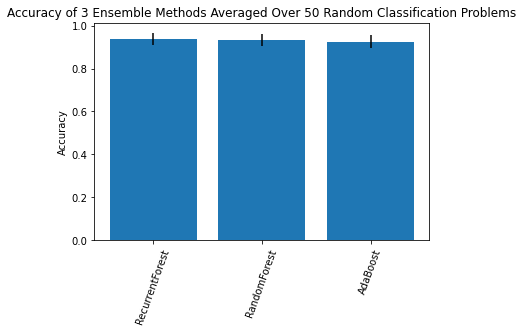

In [8]:
fig, ax = plt.subplots()
ax.bar(range(3), means, yerr = std)
ax.set_xticks(range(3))
ax.set_xticklabels(names, rotation=70)
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of 3 Ensemble Methods Averaged Over 50 Random Classification Problems")
